In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
from tqdm import tqdm

from util import parse_date #just parsing timedelt type
from util import cal_time #return string
from util import cal_usage
from util import make_timedelt
from util import voltage_change_rate_cc_anal

In [134]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

cc-20mA

In [2]:
dt_20_1_1 = pd.read_csv("data/dodi_cc/CC-20mA_1.csv").iloc[1073:784440,:3].reset_index() #행,열
dt_20_1_2 = pd.read_csv("data/dodi_cc/CC-20mA_1.csv").iloc[786000:,:3].reset_index() #행,열
dt_20_1 = dt_20_1_1.append(dt_20_1_2, ignore_index=True)
dt_20_2 = pd.read_csv("data/dodi_cc/CC-20mA_2.csv").iloc[:,:3] #행,열
dt_20 = dt_20_1.append(dt_20_2, ignore_index=True)

In [173]:
dt_20_ = pd.read_csv("data/dodi_cc/CC-20mA_1.csv").iloc[1073:, :].reset_index()

In [93]:
cal_time(dt_20['Time'][:595550])/cal_time(dt_20['Time']) * 100

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


28.653417834885637

In [92]:
cal_time(dt_20['Time'][:595550])

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1999.67it/s]


datetime.timedelta(days=3, seconds=33862)

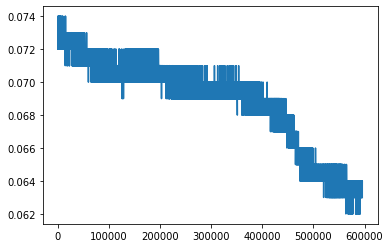

In [79]:
plt.plot(dt_20_['Power(W)'][:595550])

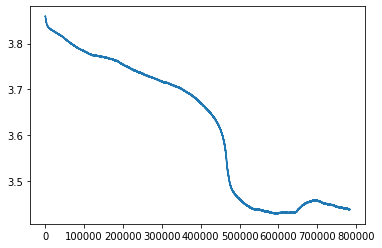

In [81]:
plt.plot(dt_20_['Voltage(V)'])

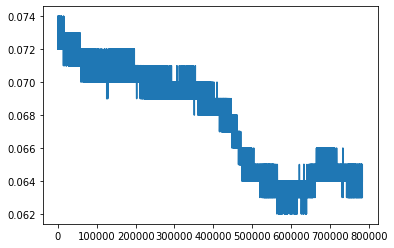

In [82]:
plt.plot(dt_20_['Power(W)'][:])

In [62]:
np.where(dt_20['Voltage(V)'] == 1)

(array([2420875, 2420877, 2420911, 2421079, 2421217, 2421221, 2421237,
        2421285, 2421333, 2421816, 2421869, 2421888, 2422000, 2422183,
        2422228, 2422450, 2422880, 2423652, 2423654, 2423709, 2423729,
        2423854, 2424086, 2424241, 2424266, 2424463, 2424483, 2424505,
        2424506, 2424526, 2424571, 2424613, 2424617], dtype=int64),)

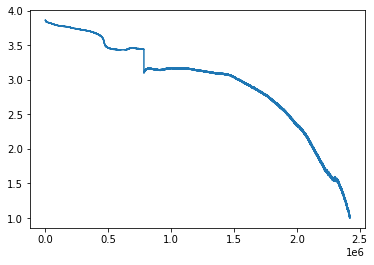

In [64]:
plt.plot(dt_20['Voltage(V)'][:2420875])

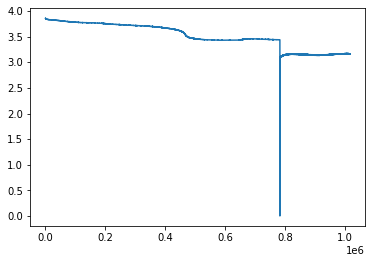

In [174]:
plt.plot(dt_20_['Voltage(V)'])

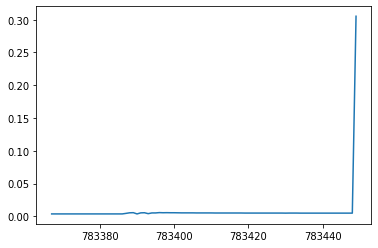

In [220]:
plt.plot(dt_20_['Voltage(V)'][783367:783450])

In [222]:
dt_20_['Voltage(V)'][783366:783460]

783366    3.4388
783367    0.0036
783368    0.0036
783369    0.0036
783370    0.0036
           ...  
783455    0.9540
783456    1.0177
783457    1.0729
783458    1.1237
783459    1.1683
Name: Voltage(V), Length: 94, dtype: float64

In [224]:
cal_time(dt_20_['Time'][783366:783368])

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2001.58it/s]


datetime.timedelta(seconds=14507)

In [223]:
dt_20_['Time'][783366:783460]

783366    2021-12-14 오전 5:47:13
783367    2021-12-14 오전 9:49:00
783368    2021-12-14 오전 9:49:01
783369    2021-12-14 오전 9:49:02
783370    2021-12-14 오전 9:49:02
                  ...          
783455    2021-12-14 오전 9:49:46
783456    2021-12-14 오전 9:49:47
783457    2021-12-14 오전 9:49:47
783458    2021-12-14 오전 9:49:48
783459    2021-12-14 오전 9:49:48
Name: Time, Length: 94, dtype: object

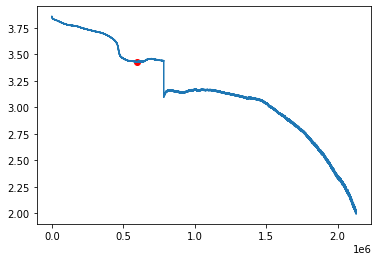

In [163]:
# plt.figure(figsize=(15,10))
plt.plot(dt_20['Voltage(V)'][:2129545])
plt.scatter(595550, dt_20['Voltage(V)'][595550], c="r")

In [3]:
voltage_change_rate_cc_anal(dt_20, 450000, 700000)

100%|████████████████████████████████████████████████████████████████████████| 250000/250000 [02:30<00:00, 1666.66it/s]


(11.14709921488353, 595550)

In [94]:
cal_time(dt_20['Time'][:595550]) / cal_time(dt_20['Time'][:2420875]) * 100

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.05it/s]


30.316371825600847

In [95]:
np.where(dt_20['Voltage(V)'] == 2)

(array([2129545, 2130584, 2130718, 2130788, 2131056, 2131166, 2131171,
        2131633, 2132565, 2132671, 2132905, 2132971, 2133506, 2133561,
        2133568, 2133630, 2133931, 2134309, 2134339, 2134435, 2134436,
        2134657, 2134713, 2134718, 2135045, 2135298, 2136027, 2136353],
       dtype=int64),)

In [65]:
cal_usage(20, dt_20['Time'], 2420875, 595550)

(1628.1222222222223, 5370.438888888889, 30.316371825600847)

In [96]:
cal_usage(20, dt_20['Time'], 2129545, 595550)

(1628.1222222222223, 4864.783333333334, 33.467517680929035)

In [146]:
cal_usage(20, dt_20['Time'], dt_20['Time'].shape[0]-1, 595550)

(1628.1222222222223, 5682.122222222222, 28.653417834885637)

In [226]:
cal_time(dt_20['Time'][:2129545]) - timedelta(seconds=14507)

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.05it/s]


datetime.timedelta(days=9, seconds=83553)

In [232]:
17223060 / 3600

4784.183333333333

In [233]:
1628.1222222222223/4784.183333333333 * 100

34.031350991055014

In [128]:
17513200/3600

4864.777777777777

In [256]:
print("걸린 시간: ", cal_time(dt_20['Time'][:561339]), ",", cal_usage(20, dt_20['Time'], 2534767, 561339-1)[2],"%에 전압이 떨어짐.")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

걸린 시간:  3 days, 4:36:06 , 27.471220398551154 %에 전압이 떨어짐.


cc-40mA

In [9]:
dt_40 = pd.read_csv("data/dodi_cc/CC-40mA.csv").iloc[1509:,:3].reset_index()

In [83]:
dt = pd.read_csv("data/dodi_cc/CC-40mA.csv").iloc[1509:, :].reset_index()

In [97]:
np.where(dt_40['Voltage(V)'] == 2)

(array([1545180, 1545369, 1545484, 1545487, 1545493, 1545528, 1545580,
        1545695, 1545706], dtype=int64),)

In [140]:
cal_usage(40, dt_40['Time'], 1545180, 309299)

(1309.3555555555554, 7141.9111111111115, 18.333405935541684)

In [114]:
cal_time(dt_40['Time'][:1545180])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


datetime.timedelta(days=7, seconds=37971)

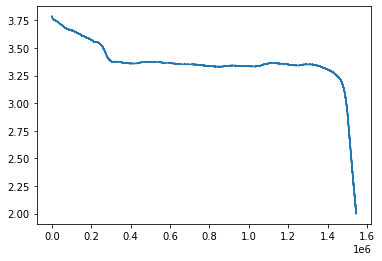

In [287]:
plt.plot(dt_40['Voltage(V)'][:1545180])

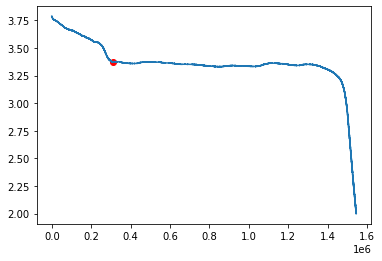

In [158]:
# plt.figure(figsize=(15,10))
plt.plot(dt_40['Voltage(V)'][:1545180])
plt.scatter(309299, dt_40['Voltage(V)'][309299], c="r")

In [143]:
voltage_change_rate_cc_anal(dt_40, 270000, 340000)

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:05<00:00, 12809.08it/s]


(10.94707373758715, 309299)

In [141]:
dt_40['Voltage(V)'][309299]

3.3719

In [68]:
print("걸린 시간: ", cal_time(dt_40['Time'][:320000]), ",", cal_usage(40, dt_40['Time'], 320000-1)[2],"%에 전압이 떨어짐.")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

걸린 시간:  1 day, 9:52:59 , 15.944967320261439 %에 전압이 떨어짐.


In [265]:
print("걸린 시간: ", cal_time(dt_40['Time'][:351091]), ",", cal_usage(40, dt_40['Time'], 1633177, 351091-1)[2],"%에 전압이 떨어짐.")

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2001.10it/s]

걸린 시간:  1 day, 13:18:25 , 19.635032974808738 %에 전압이 떨어짐.


cc-60mA

In [25]:
dt_60 = pd.read_csv("data/dodi_cc/CC-60mA.csv").iloc[1564:,:3].reset_index()

In [99]:
np.where(dt_60['Voltage(V)'] == 2)

(array([1069741, 1069743, 1069745, 1069865, 1069941, 1069944, 1069954,
        1070012], dtype=int64),)

In [100]:
cal_usage(60, dt_60['Time'], 1069741, 247295)

(1282.5, 5936.25, 21.60454832596336)

In [119]:
cal_time(dt_60['Time'][:1069741])

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.05it/s]


datetime.timedelta(days=4, seconds=10574)

In [123]:
21370440 / 3600

5936.233333333334

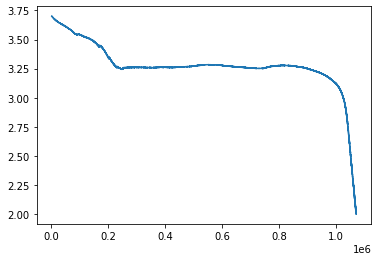

In [289]:
plt.plot(dt_60['Voltage(V)'][:1069741])

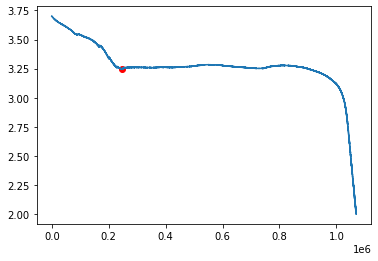

In [166]:
# plt.figure(figsize=(15,10))
plt.plot(dt_60['Voltage(V)'][:1069741])
plt.scatter(247295, dt_60['Voltage(V)'][247295], c="r")

In [27]:
voltage_change_rate_cc_anal(dt_60, 200000, 270000)

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:05<00:00, 13614.22it/s]


(12.34831491040783, 247295)

In [60]:
print("걸린 시간: ", cal_time(dt_60['Time'][:250000]), ",", cal_usage(60, dt_60['Time'], 250000-1)[2],"%에 전압이 떨어짐.")

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1999.67it/s]

걸린 시간:  21:36:15 , 15.25 %에 전압이 떨어짐.


cc-80mA

In [28]:
dt_80 = pd.read_csv("data/dodi_cc/CC-80mA.csv").iloc[2251:,:3].reset_index()

In [101]:
np.where(dt_80['Voltage(V)'] == 2)

(array([926082], dtype=int64),)

In [102]:
cal_usage(80, dt_80['Time'], 926082, 237901)

(1258.8666666666668, 5348.577777777778, 23.536474909217823)

In [104]:
(cal_time(dt_80['Time'][:926082]).days * 24 * 3600) + cal_time(dt_80['Time'][:926082]).seconds

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.05it/s]


240686

In [112]:
cal_time(dt_80['Time'][:237902])

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2001.10it/s]


datetime.timedelta(seconds=56649)

In [111]:
dt_80['Voltage(V)'][0]

3.6869

In [ ]:
dt_80['Voltage(V)'][]

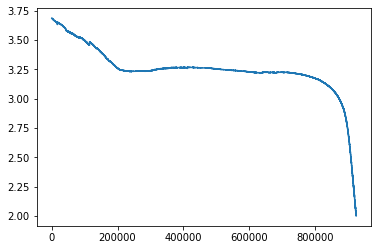

In [61]:
# plt.figure(figsize=(15,10))
plt.plot(dt_80['Voltage(V)'][:926082])
# plt.plot(dt_60['Voltage(V)'][:1069741])
# plt.plot(dt_40['Voltage(V)'][:1545180])
# plt.plot(dt_20['Voltage(V)'][:2129545])

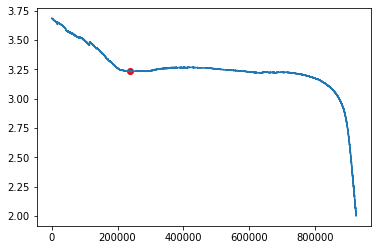

In [169]:
# plt.figure(figsize=(15,10))
plt.plot(dt_80['Voltage(V)'][:926082])
plt.scatter(237901, dt_80['Voltage(V)'][237901], c="r")

In [109]:
19254880 / 3600

5348.577777777778

In [30]:
voltage_change_rate_cc_anal(dt_80, 180000, 250000)

100%|█████████████████████████████████████████████████████████████████████████| 70000/70000 [00:05<00:00, 13409.05it/s]


(12.327429547858632, 237901)

In [63]:
print("걸린 시간: ", cal_time(dt_80['Time'][:220000]), ",", cal_usage(80, dt_80['Time'], 220000-1)[2],"%에 전압이 떨어짐.")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

걸린 시간:  14:29:58 , 13.646535947712419 %에 전압이 떨어짐.
